In [59]:
%reset -f
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [60]:
sift = cv2.xfeatures2d.SIFT_create()
orb = cv2.ORB_create()

In [101]:
images = glob.glob('Images/*.tif')[:5]
images

['Images/ID2065.tif',
 'Images/ID2327.tif',
 'Images/ID1042.tif',
 'Images/ID0224.tif',
 'Images/ID3457.tif']

In [102]:
def isSquare(approx, originalImg):
    if len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        # a square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        if 30 < w and w < 70 and 30 < h and h < 70 and ar >= 0.95:    
        #    print("It's square")
            return True, (x,y)#originalImg[x + w//2, y + h//2] 
    return False, None
        

def isolateBox(inputImage):
    gray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key = cv2.contourArea)
        
    imCopy = cv2.drawContours(thresh.copy() * 0, largest_areas, -1, (255,255,255), 3)
    # Copy the thresholded image.
    im_floodfill = imCopy.copy()

    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = thresh.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (10,10), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = imCopy | im_floodfill_inv
    result = cv2.bitwise_and(inputImage, inputImage, mask = im_out)
    
    for cont in contours:
        peri = cv2.arcLength(cont, True)
        approx = cv2.approxPolyDP(cont, 0.05 * peri, True)
        (found, pixel) = isSquare(approx, result)
        if found:
        #    print(pixel)
            result = cv2.fillPoly(result, [cont], color = (0,255,0)) 
            
    
    return result

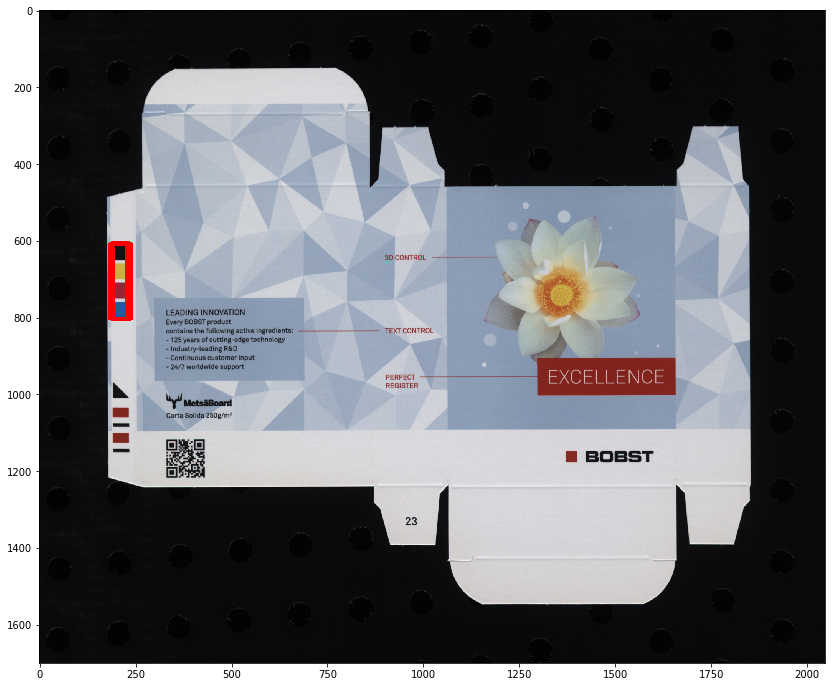

In [103]:
img = cv2.imread(images[0])

rows,cols, _ = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),20,1)
dst = cv2.warpAffine(img,M,(cols,rows))

resImg = img.copy()
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pattern = cv2.cvtColor(cv2.imread("pattern.png"), cv2.COLOR_BGR2GRAY)
res = cv2.matchTemplate(gray_image,pattern,cv2.TM_CCOEFF_NORMED)

w, h = pattern.shape[::-1]

threshold = 0.7
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    resImg = cv2.rectangle(resImg, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(cv2.cvtColor(resImg, cv2.COLOR_BGR2RGB))

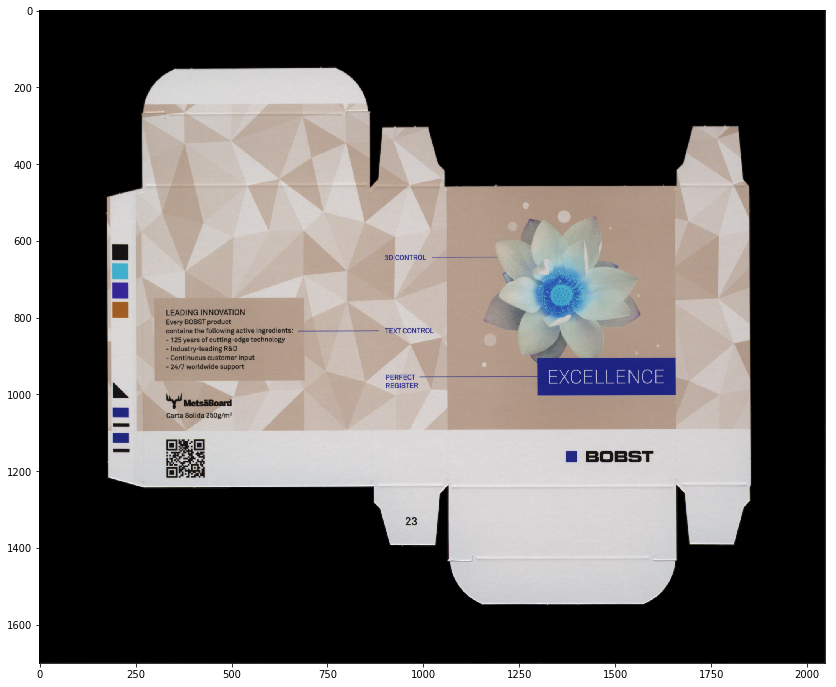

In [104]:
def isolateBox(inputImage):
    gray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    imCopy = cv2.drawContours(thresh.copy() * 0, largest_areas, -1, (255,255,255), 3)
    # Copy the thresholded image.
    im_floodfill = imCopy.copy()

    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = thresh.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (10,10), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = imCopy | im_floodfill_inv
    result = cv2.bitwise_and(inputImage, inputImage, mask = im_out)
    #For some dumb plotting
    #plt.imshow(thresh, cmap = 'gray')

    return result
resImg = isolateBox(img)
plt.imshow(resImg)

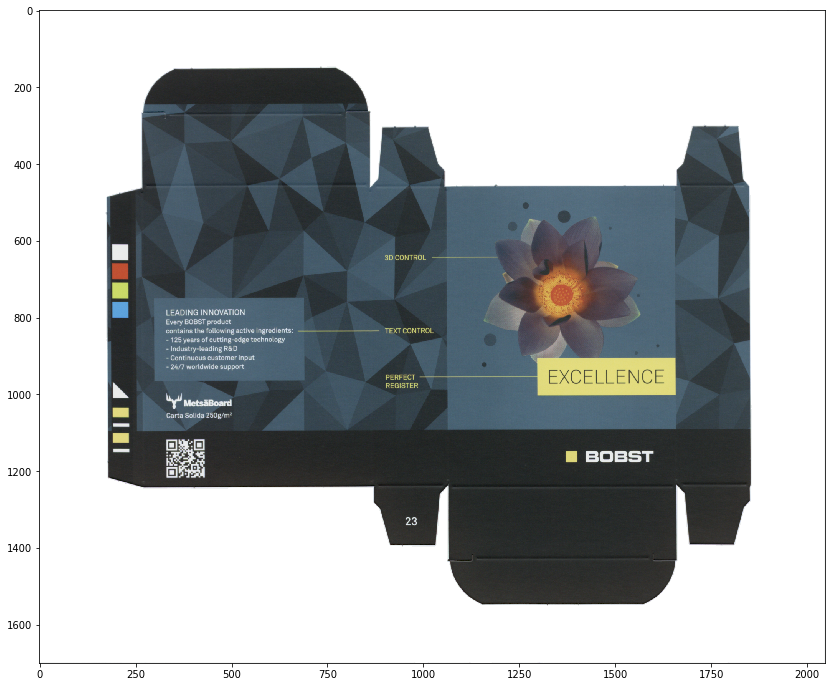

In [105]:
neg_img = cv2.bitwise_not(isolateBox(img))
plt.imshow(neg_img)

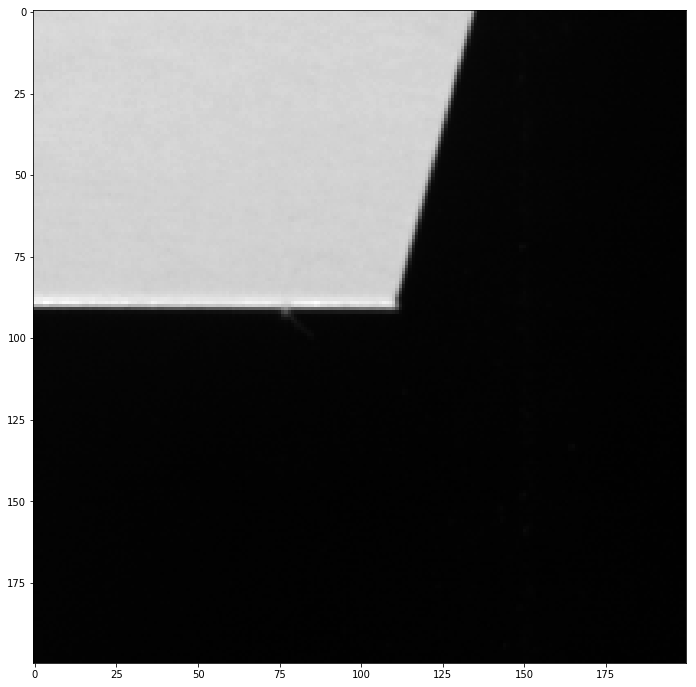

In [132]:
images = glob.glob('Images/*.tif')[:5]
y_cornerSW = 1100
x_cornerSW = 100

y_cornerNE = 1300
x_cornerNE = 1700

width = 200

img_1 = cv2.imread(images[0])
cornerSW_1 = cv2.cvtColor(img_1[y_cornerSW:y_cornerSW+width, x_cornerSW:x_cornerSW+width] ,cv2.COLOR_BGR2GRAY)
cornerNE_1 = cv2.cvtColor(img_1[y_cornerNE:y_cornerNE+width, x_cornerNE:x_cornerNE+width] ,cv2.COLOR_BGR2GRAY)
plt.imshow(cornerNE_1, cmap='gray')

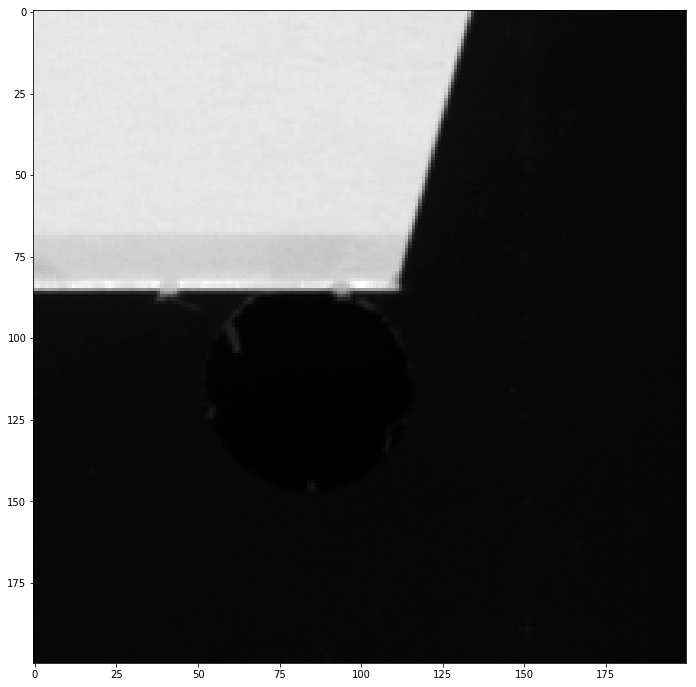

In [133]:
img_2 = cv2.imread(images[1])
cornerSW_2 = cv2.cvtColor(img_2[y_cornerSW:y_cornerSW+width, x_cornerSW:x_cornerSW+width] ,cv2.COLOR_BGR2GRAY)
cornerNE_2 = cv2.cvtColor(img_2[y_cornerNE:y_cornerNE+width, x_cornerNE:x_cornerNE+width] ,cv2.COLOR_BGR2GRAY)
plt.imshow(cornerNE_2, cmap='gray')

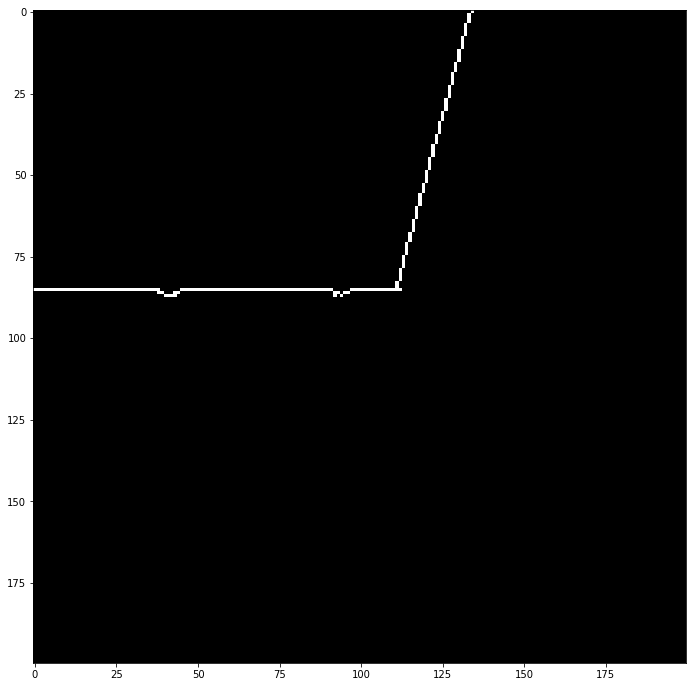

In [318]:
edges_1 = cv2.Canny(cornerNE_1,100,200)
edges_2 = cv2.Canny(cornerNE_2,100,200)
plt.imshow(edges_2, cmap='gray')

In [329]:
edges_1[1].shape

(200,)

In [333]:
np.where(edges_1)
rows = np.where(edges_1[0, :] == 0)
rows

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

(9,)

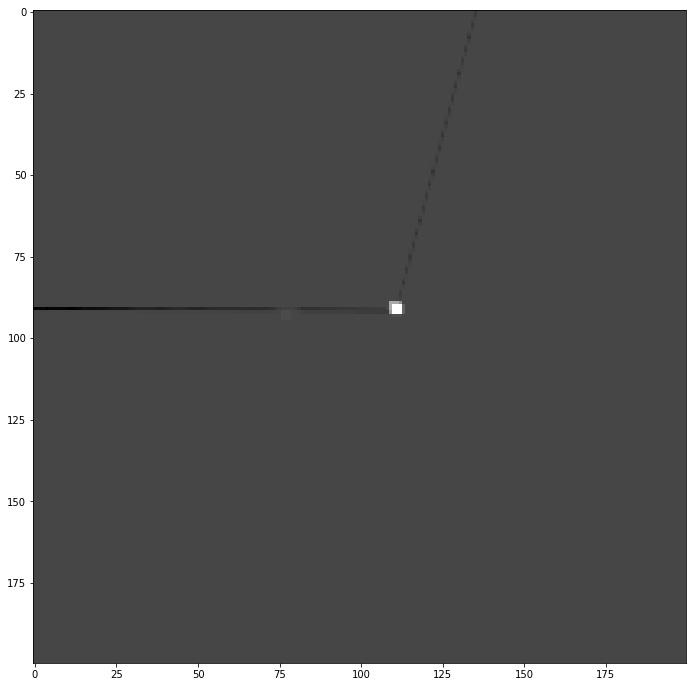

In [344]:
dst = cv2.cornerHarris(cornerNE_1,2,3,0.04)
dst = cv2.dilate(dst,None) 
plt.imshow(dst, cmap='gray')
dst[dst>0.004].shape

In [345]:
pts1 = edges_1[edges_1>0]#np.float32([[50,50],[200,50],[50,200]])
pts2 = edges_2[edges_2>0]#np.float32([[10,100],[200,50],[100,250]])
pts1 = (np.where(edges_1>0)[0], np.where(edges_1>0)[1], edges_1[np.where(edges_1>0)])

dst = cv2.cornerHarris(cornerNE_1,2,3,0.04)
dst = cv2.dilate(dst,None) 
pts1 = dst[dst>0.004]

M = cv2.getAffineTransform(pts1,pts1)

dst = cv2.warpAffine(dst_1,M,(width,width))

#h, status = cv2.findHomography(dst_1, dst_2)
plt.imshow(dst, cmap='gray')

error: /io/opencv/modules/imgproc/src/imgwarp.cpp:6428: error: (-215) src.checkVector(2, CV_32F) == 3 && dst.checkVector(2, CV_32F) == 3 in function getAffineTransform


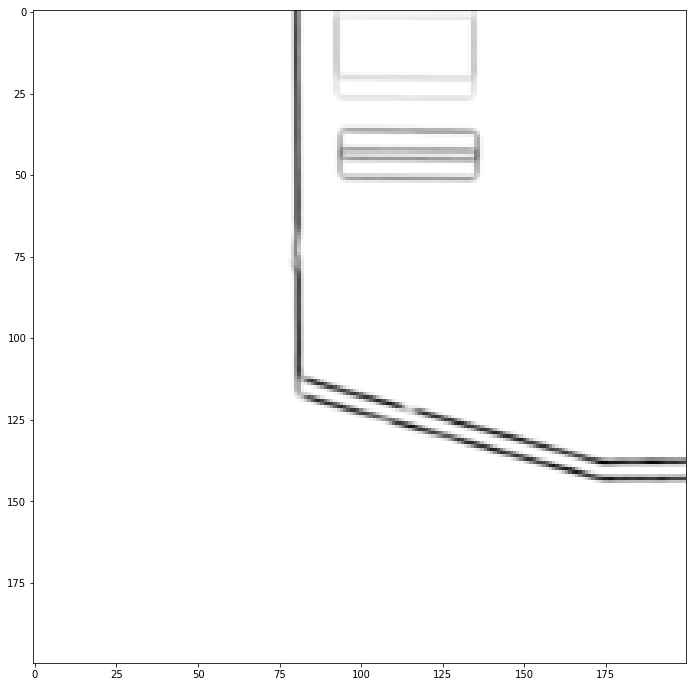

In [149]:
dst_1 = cv2.cornerHarris(cornerSW_1,2,3,1)
dst_2 = cv2.cornerHarris(cornerSW_2,2,3,1)
plt.imshow(dst_1 + dst_2, cmap='gray')

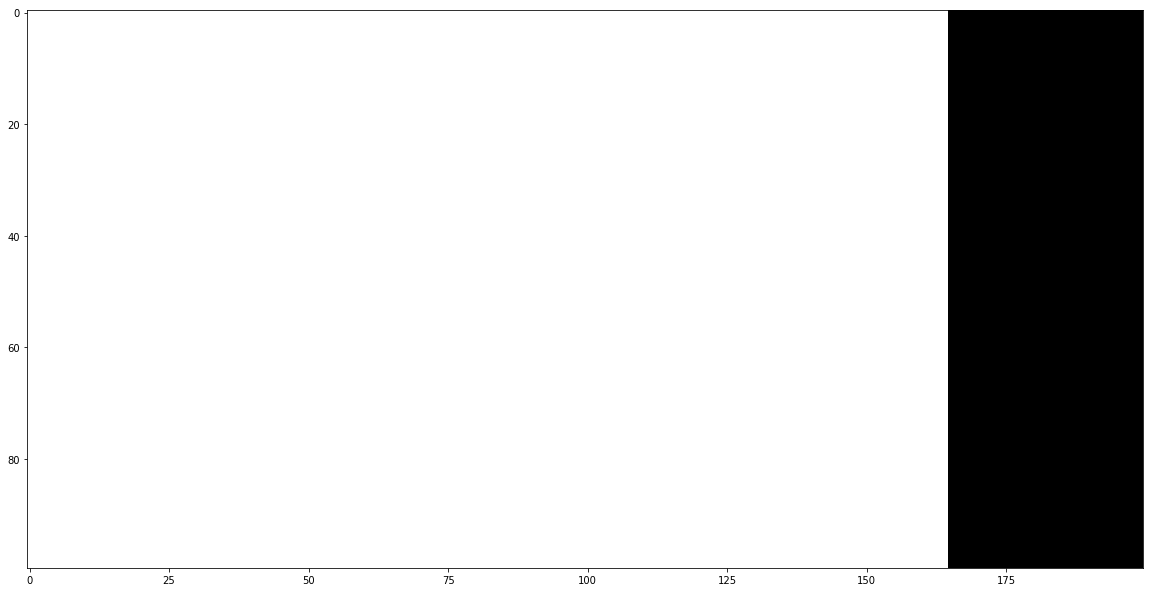

In [107]:
for pic in images:
    img = cv2.imread(pic)
    neg_img = cv2.bitwise_not(isolateBox(img))
    ret,th1 = cv2.threshold(neg_img,254,255,cv2.THRESH_BINARY)
    crop_img = th1[300:400, 100:300] 
    cv2.imwrite("output/" + os.path.basename(pic),crop_img)
plt.imshow(cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY), cmap='gray')

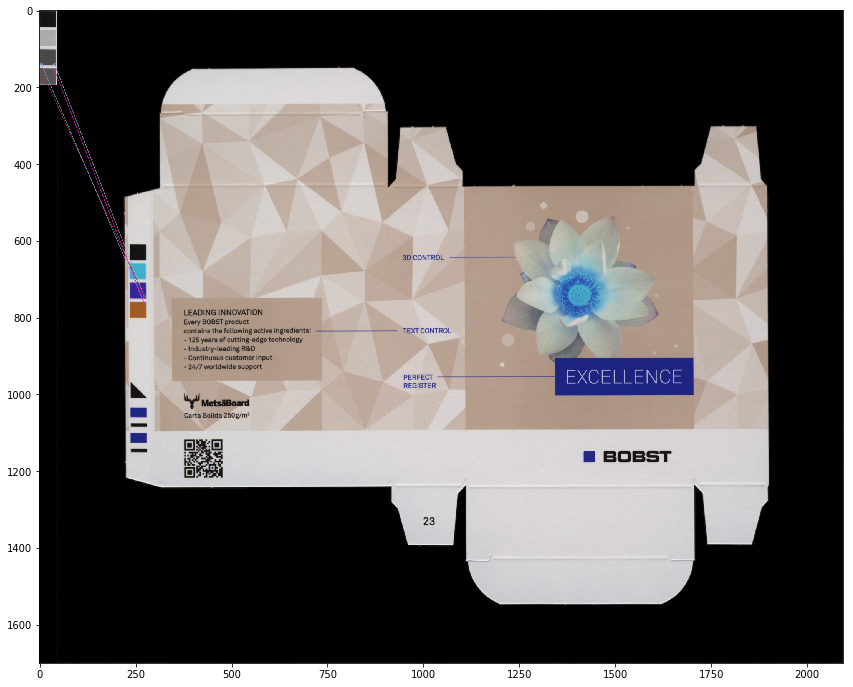

(<matplotlib.image.AxesImage at 0x7f7a59632208>, None)

In [108]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(pattern,None)
kp2, des2 = sift.detectAndCompute(resImg,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(pattern,kp1,resImg,kp2,good,None, flags=2)

plt.imshow(img3),plt.show()

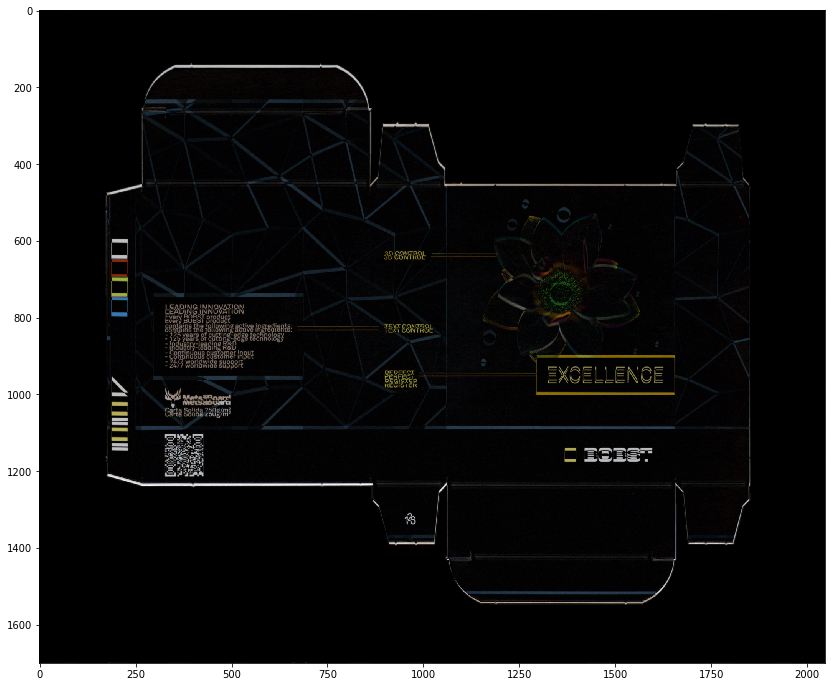

In [50]:
img1, img2 = cv2.imread(glob.glob('Images/*.tif')[2]), cv2.imread(glob.glob('Images/*.tif')[3])
diffImage = cv2.absdiff(isolateBox(img1), isolateBox(img2))

foregroundMask = np.zeros((diffImage.shape[0],diffImage.shape[1],3), np.uint8)
for j in range(diffImage.shape[0]):
    for i in range(diffImage.shape[1]):
        if np.linalg.norm(diffImage[j, i]) > 30:
            foregroundMask[j, i] = 255
        

plt.imshow(diffImage)

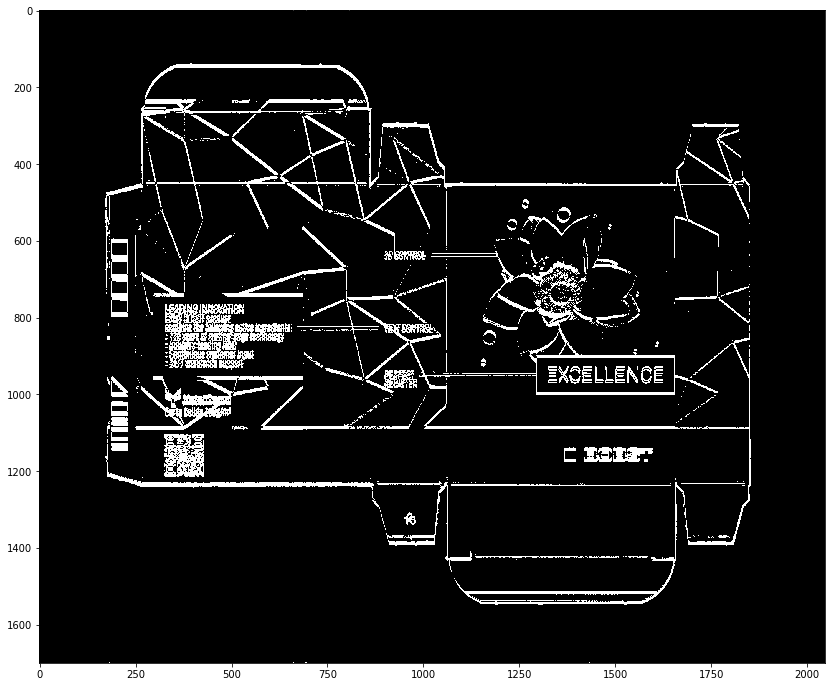

In [51]:
plt.imshow(foregroundMask)

In [54]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 100000*(-b))
    y1 = int(y0 + 100000*(a))
    x2 = int(x0 - 100000*(-b))
    y2 = int(y0 - 100000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

True

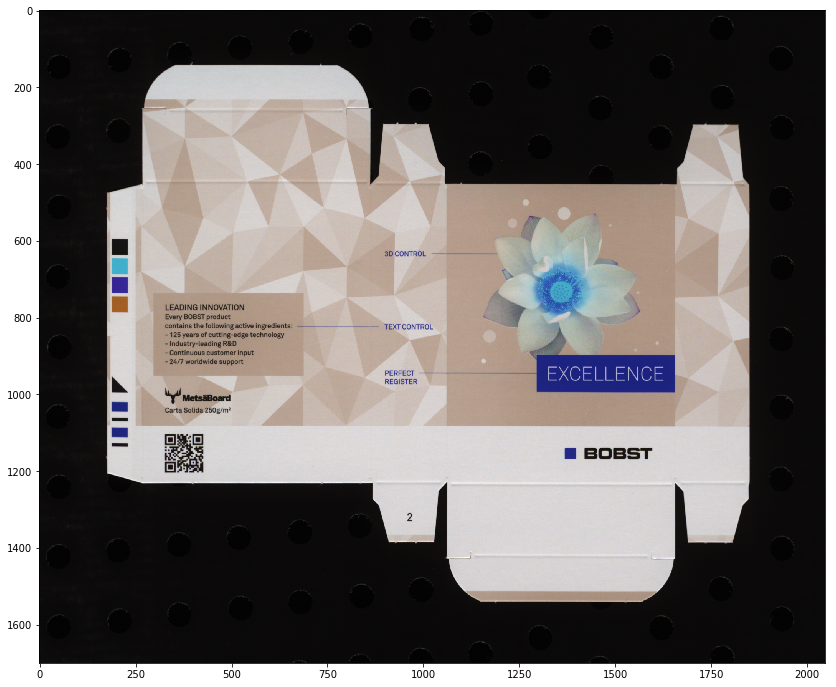

In [56]:
plt.imshow(img1)

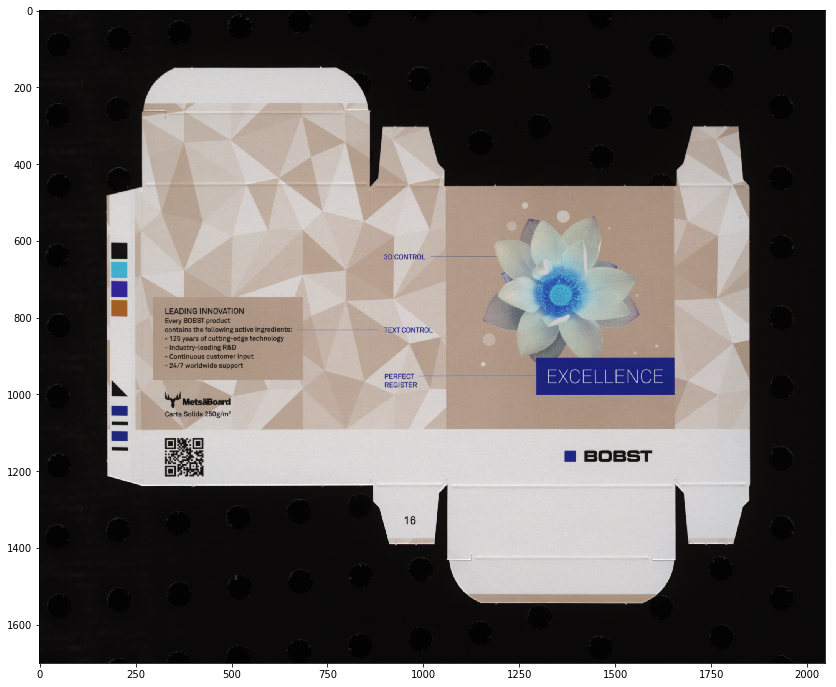

In [58]:
plt.imshow(img2)